In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("seaborn")

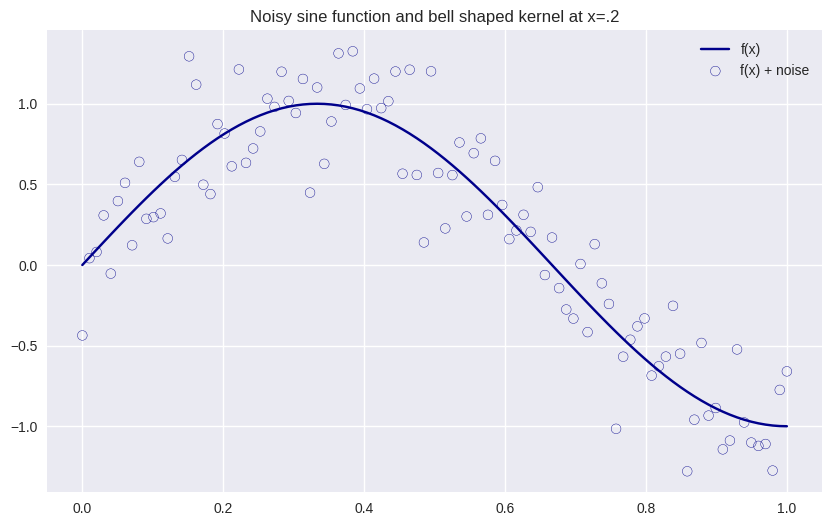

In [3]:
x = np.linspace(0, 1, 100)
noise = np.random.normal(loc=0, scale = .25, size = 100)
y = np.sin(x*1.5*np.pi)
y_noise = y + noise

plt.figure(figsize=(10, 6))
plt.plot(x, y, color = 'darkblue', label = 'f(x)')
plt.scatter(x, y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'f(x) + noise')
plt.legend()
plt.title("Noisy sine function and bell shaped kernel at x=.2")
plt.show()

In [4]:
from math import ceil
import numpy as np
from scipy import linalg

def kernel_function(xi, x0, tau = .005):
    return np.exp( - (xi - x0)**2/(2*tau**2))

def lwr(x, y, xtest, tau=.005):
    yest = np.zeros(len(xtest))
    
    for i in range(len(xtest)):
        weights = np.array([np.exp(-(x-xtest[i])**2/(2*tau**2))])
        b = np.array([np.sum(weights*y), np.sum(weights*y*x)])
        A = np.array([[np.sum(weights), np.sum(weights*x)], [np.sum(weights*x), np.sum(weights*x*x)]])
        
        theta = linalg.solve(A, b)
        
        yest[i] = theta[0] + theta[1] * xtest[i]
    
    return yest

In [5]:
tau = 0.05
xtest = np.linspace(0, 1, 50)
yest_bell = lwr(x, y, xtest, tau)
print(len(xtest), len(yest_bell))

50 50


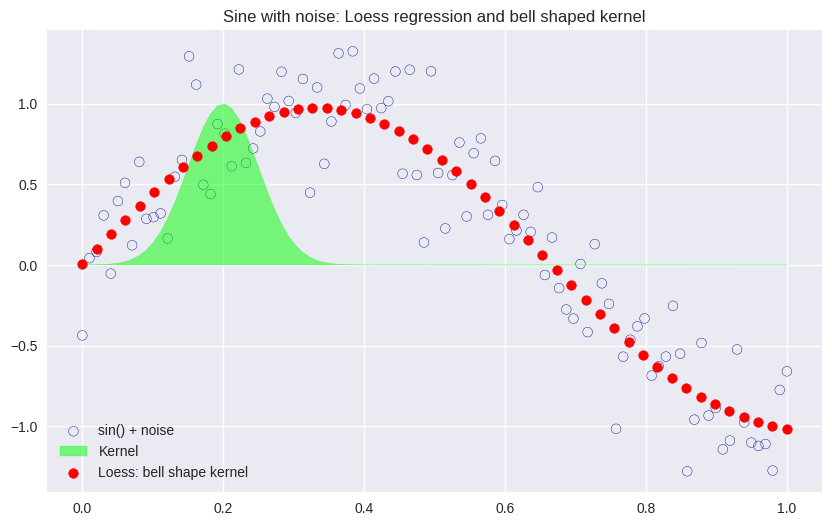

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(x, y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'sin() + noise')
plt.fill(x, kernel_function(x,0.2, tau), color = 'lime', alpha=.5, label='Kernel')
plt.scatter(xtest, yest_bell, color = 'red', label = 'Loess: bell shape kernel')
plt.legend()
plt.title("Sine with noise: Loess regression and bell shaped kernel")
plt.show()